In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr

from netCDF4 import Dataset
import matplotlib.pyplot as plt

In [2]:
# Read file and view variables
ncfile = ("../data/total_ssp245_medium_confidence_values.nc")
ds = xr.open_dataset(ncfile)

In [3]:
ds

<xarray.Dataset>
Dimensions:           (locations: 66190, quantiles: 107, years: 14)
Coordinates:
  * years             (years) int32 2020 2030 2040 2050 ... 2120 2130 2140 2150
  * locations         (locations) int32 1 2 3 ... 1018003580 1018003590
  * quantiles         (quantiles) float32 0.0 0.001 0.005 ... 0.995 0.999 1.0
Data variables:
    lat               (locations) float32 ...
    lon               (locations) float32 ...
    sea_level_change  (quantiles, years, locations) float32 ...
Attributes:
    description:  Combined confidence output file for AR6 sea-level change pr...
    history:      Created Sat Jul 10 15:21:03 2021
    source:       Files Combined: /projects/kopp/ar6/regional/pboxes/pb_1f/ss...

In [4]:
# we can see that sea_level_change has 3 dimensions - quantiles, years, values

In [5]:
# Read with nc4 library
nc_fid = Dataset(ncfile, 'r')

# extract data
lats = nc_fid.variables['lat'][:]
lons = nc_fid.variables['lon'][:]
slr = nc_fid.variables['sea_level_change'][:]

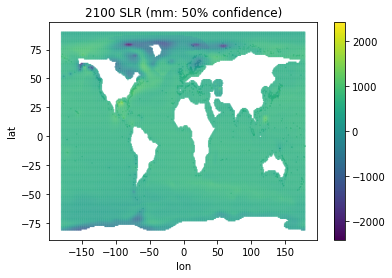

In [6]:
# Plot only the 50% confidence interval for 2100

plt.scatter(lons, lats, c = slr[56,8,:], s = 0.1)
plt.title(str(np.array(ds.years.values)[8]) + " SLR (mm: 50% confidence)")
plt.colorbar()
plt.ylabel("lat")
plt.xlabel("lon")
plt.show()


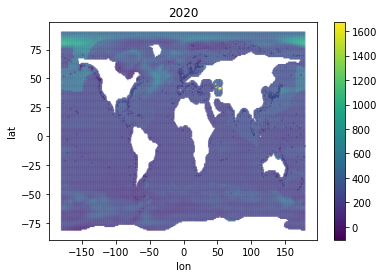

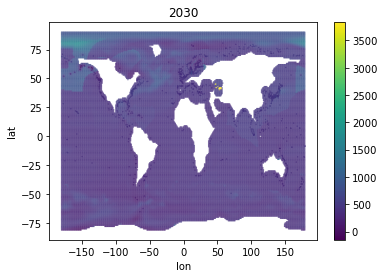

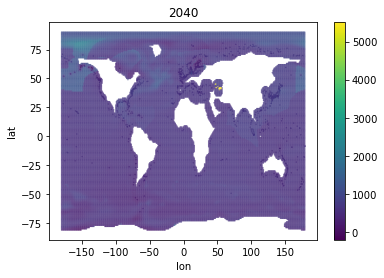

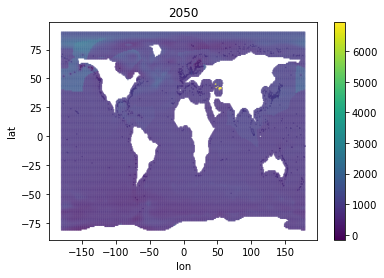

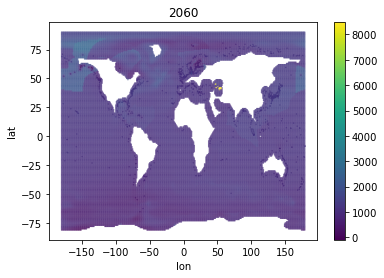

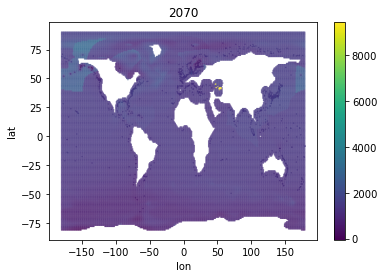

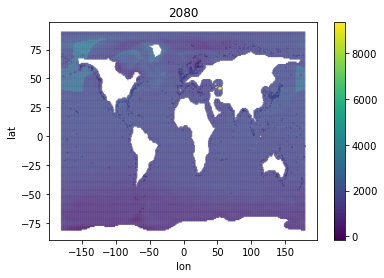

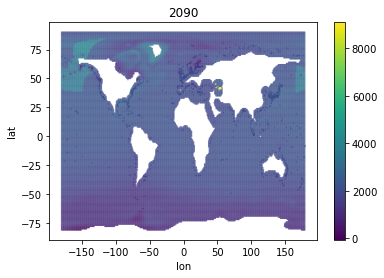

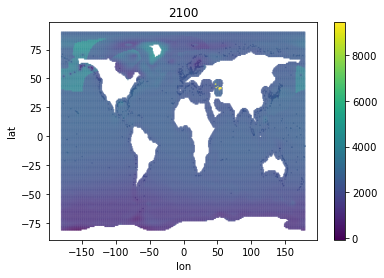

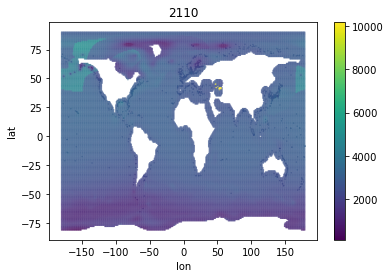

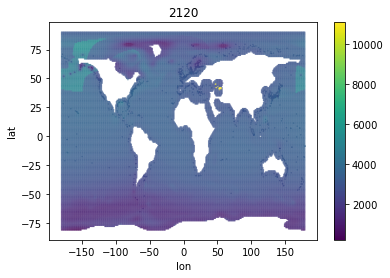

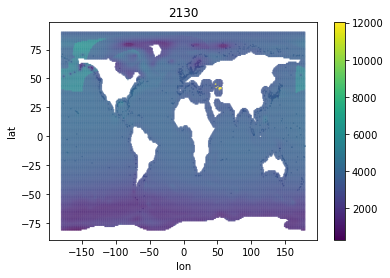

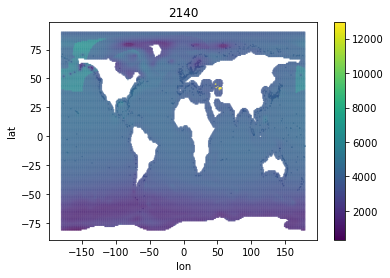

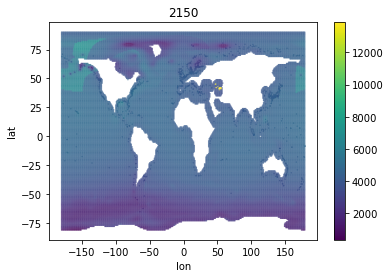

In [7]:
# loop through each year (second dim in slr)
# scatterplot the (lats, lons, data) for a single confidence interval

for i in range(slr.shape[1]):

    plt.scatter(lons, lats, c = slr[-1,i,:], s = 0.1)
    plt.title(np.array(ds.years.values)[i])
    plt.colorbar()
    plt.ylabel("lat")
    plt.xlabel("lon")
    plt.show()
    

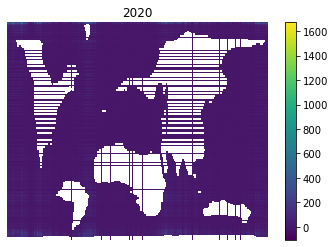

/opt/anaconda3/envs/rsenv/lib/python3.8/site-packages/matplotlib/image.py:446: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/opt/anaconda3/envs/rsenv/lib/python3.8/site-packages/matplotlib/image.py:451: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


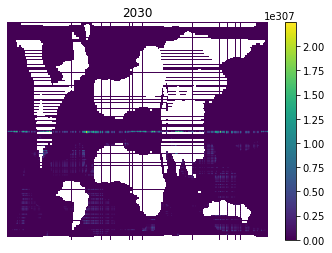

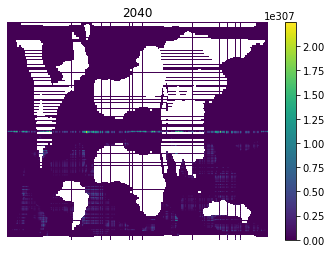

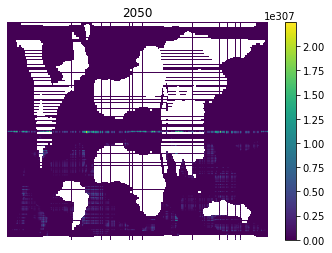

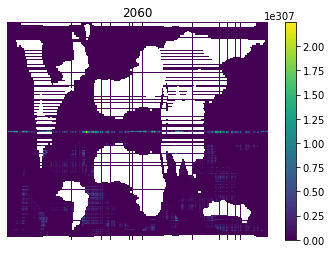

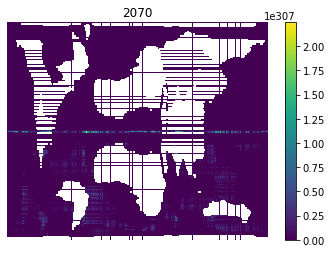

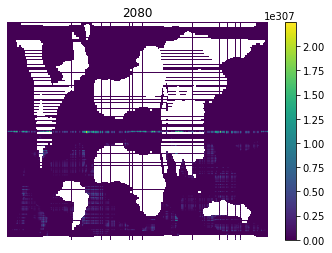

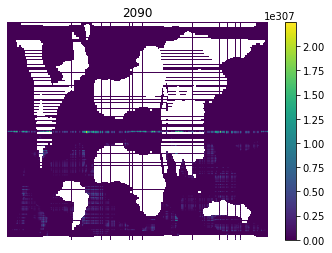

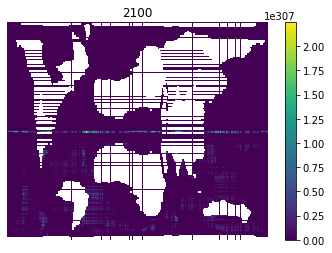

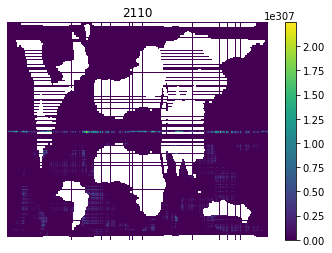

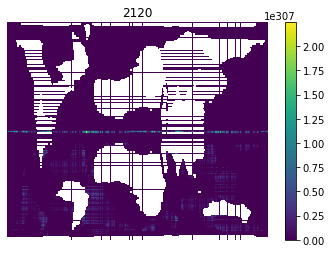

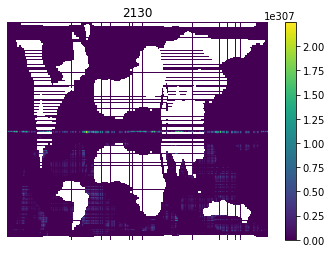

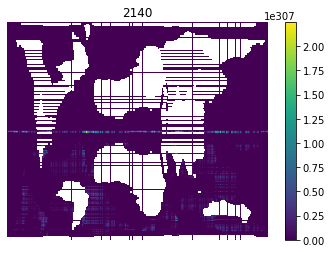

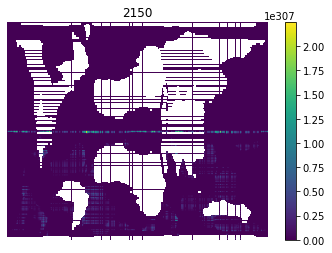

In [8]:
# Get each year as a 2d slice

lat_vals, lat_idx = np.unique(lats.data, return_inverse=True)
lon_vals, lon_idx = np.unique(lons.data, return_inverse=True)

for i in range(0,slr.shape[1]):
    
    slr_slice = slr[-1,i,:].data 
    vals_array = np.empty(lat_vals.shape + lon_vals.shape)
    vals_array[lat_idx, lon_idx] = slr_slice
    vals_array[vals_array <= -32768.0] = np.nan
    plt.title(np.array(ds.years.values)[i])
    plt.imshow(np.flipud(vals_array))
    plt.axis("off")
    plt.colorbar()
    plt.show()
    